In [31]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix , classification_report

In [32]:
from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

In [33]:
(X_train, y_train),(X_test,y_test) = datasets.cifar100.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# 50000 samples 32*32 pixels and 3 for RGB channels

In [34]:
X_test.shape

(10000, 32, 32, 3)

In [35]:
X_train[0]

array([[[179, 183, 206],
        [157, 162, 187],
        [139, 144, 176],
        ...,
        [ 42,  47,  87],
        [ 32,  38,  74],
        [ 24,  31,  61]],

       [[184, 186, 205],
        [172, 175, 194],
        [163, 167, 186],
        ...,
        [ 38,  44,  83],
        [ 34,  41,  75],
        [ 24,  32,  58]],

       [[156, 161, 189],
        [138, 142, 173],
        [122, 126, 157],
        ...,
        [ 34,  41,  77],
        [ 31,  39,  71],
        [ 24,  30,  56]],

       ...,

       [[ 28,  36,  68],
        [ 37,  48,  89],
        [ 29,  36,  69],
        ...,
        [ 22,  24,  44],
        [ 22,  22,  35],
        [ 22,  22,  35]],

       [[ 24,  34,  66],
        [ 34,  46,  86],
        [ 36,  43,  84],
        ...,
        [ 29,  34,  57],
        [ 24,  29,  48],
        [ 29,  31,  53]],

       [[ 19,  25,  49],
        [ 22,  29,  60],
        [ 30,  41,  74],
        ...,
        [ 27,  31,  54],
        [ 22,  26,  46],
        [ 29,  30,  53]]

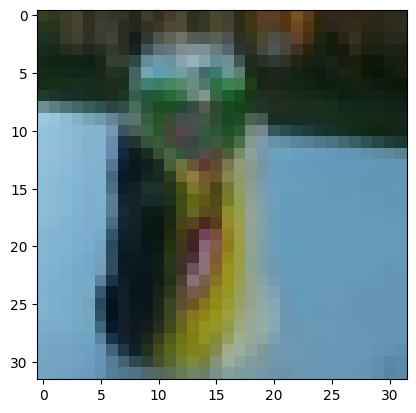

In [36]:
plt.imshow(X_train[6])

In [37]:
y_test = y_test.reshape(-1)
y_train = y_train.reshape(-1,)
y_val = y_val.reshape(-1,)

In [38]:
# Define class names
classes = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle',
    'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon',
    'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television',
    'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

In [39]:
def plot_sample(X,y,index):
    ''' takes x and y as index and prints that particular sample and also print the label '''
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

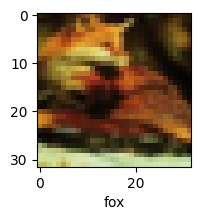

In [40]:
plot_sample(X_train,y_train,5)

In [41]:
#normalizing data
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [12]:
%%time
#Simple Artificial Neural Network
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),  
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),   
    layers.Dropout(0.5),
    layers.Dense(100, activation='softmax')
])

ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history_ann = ann.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
1250/1250 [==============================] - 4s 2ms/step - loss: 4.5904 - accuracy: 0.0119 - val_loss: 4.4922 - val_accuracy: 0.0214
Epoch 2/20
1250/1250 [==============================] - 3s 2ms/step - loss: 4.5422 - accuracy: 0.0148 - val_loss: 4.4627 - val_accuracy: 0.0259
Epoch 3/20
1250/1250 [==============================] - 3s 2ms/step - loss: 4.5060 - accuracy: 0.0181 - val_loss: 4.4663 - val_accuracy: 0.0229
Epoch 4/20
1250/1250 [==============================] - 3s 2ms/step - loss: 4.4731 - accuracy: 0.0203 - val_loss: 4.4048 - val_accuracy: 0.0254
Epoch 5/20
1250/1250 [==============================] - 3s 2ms/step - loss: 4.4433 - accuracy: 0.0225 - val_loss: 4.3990 - val_accuracy: 0.0254
Epoch 6/20
1250/1250 [==============================] - 3s 2ms/step - loss: 4.4281 - accuracy: 0.0246 - val_loss: 4.3886 - val_accuracy: 0.0262
Epoch 7/20
1250/1250 [==============================] - 3s 2ms/step - loss: 4.4210 - accuracy: 0.0251 - val_loss: 4.3903 - val_accuracy:

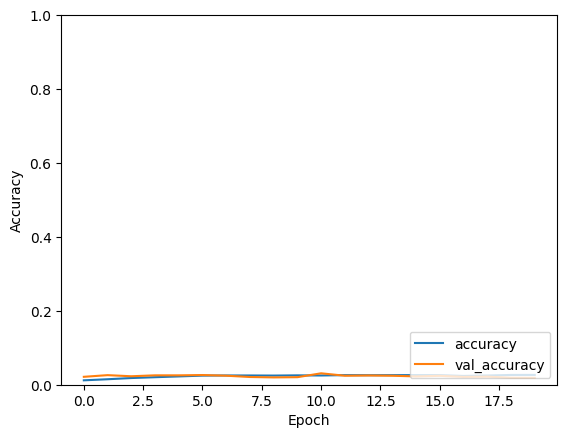

In [13]:
# Plot ANN training history
plt.plot(history_ann.history['accuracy'], label='accuracy')
plt.plot(history_ann.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [14]:
# Evaluate ANN model on test set
test_loss, test_acc = ann.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')




313/313 [==============================] - 0s 1ms/step - loss: 4.4168 - accuracy: 0.0194
Test accuracy: 0.01940000057220459


In [15]:
# Make predictions using ANN model
y_pred_ann = np.argmax(ann.predict(X_test), axis=-1)



313/313 [==============================] - 0s 755us/step


In [16]:
# Print classification report for ANN model
print(classification_report(y_test, y_pred_ann))



              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       100
          11       0.00      0.00      0.00       100
          12       0.00      0.00      0.00       100
          13       0.00      0.00      0.00       100
          14       0.00      0.00      0.00       100
          15       0.00      0.00      0.00       100
          16       0.00      0.00      0.00       100
          17       0.00    

C:\Users\Nisharg Gosai\.conda\envs\tensorflowgpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nisharg Gosai\.conda\envs\tensorflowgpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nisharg Gosai\.conda\envs\tensorflowgpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

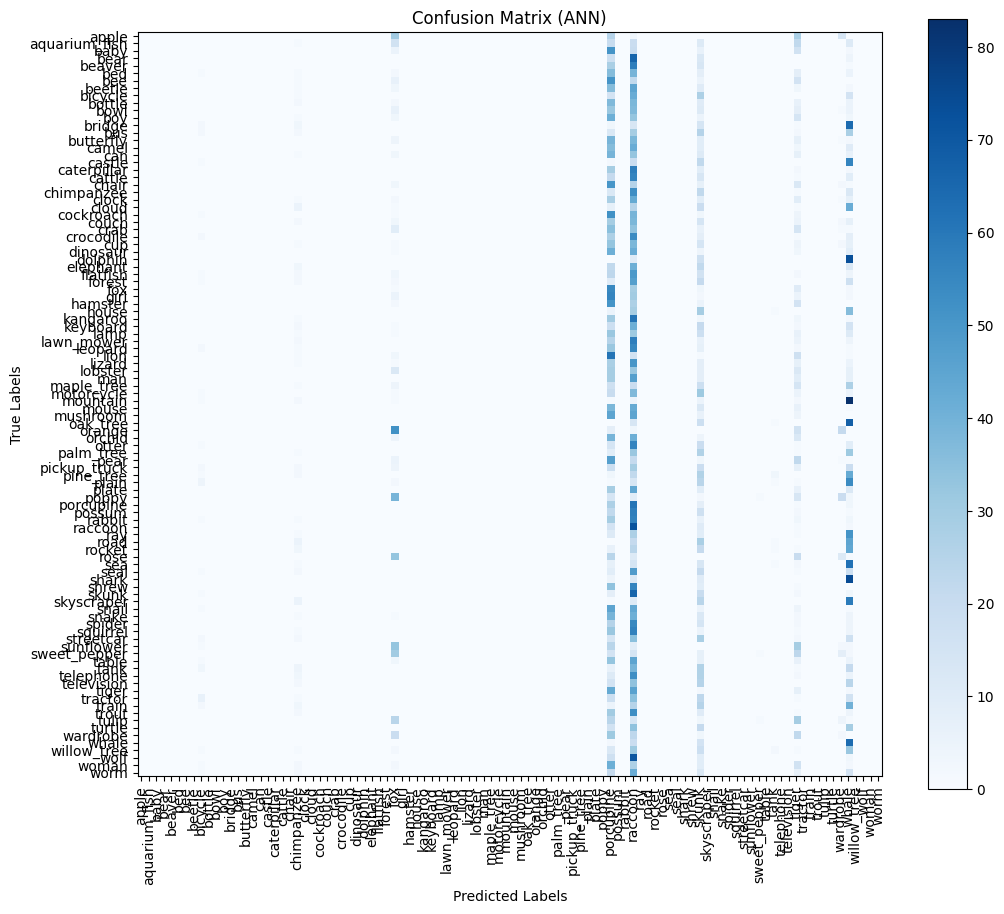

In [17]:
# Plot confusion matrix for ANN model
conf_mat_ann = confusion_matrix(y_test, y_pred_ann)
plt.figure(figsize=(12, 10))
plt.imshow(conf_mat_ann, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix (ANN)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=range(100), labels=classes, rotation=90)
plt.yticks(ticks=range(100), labels=classes)
plt.show()

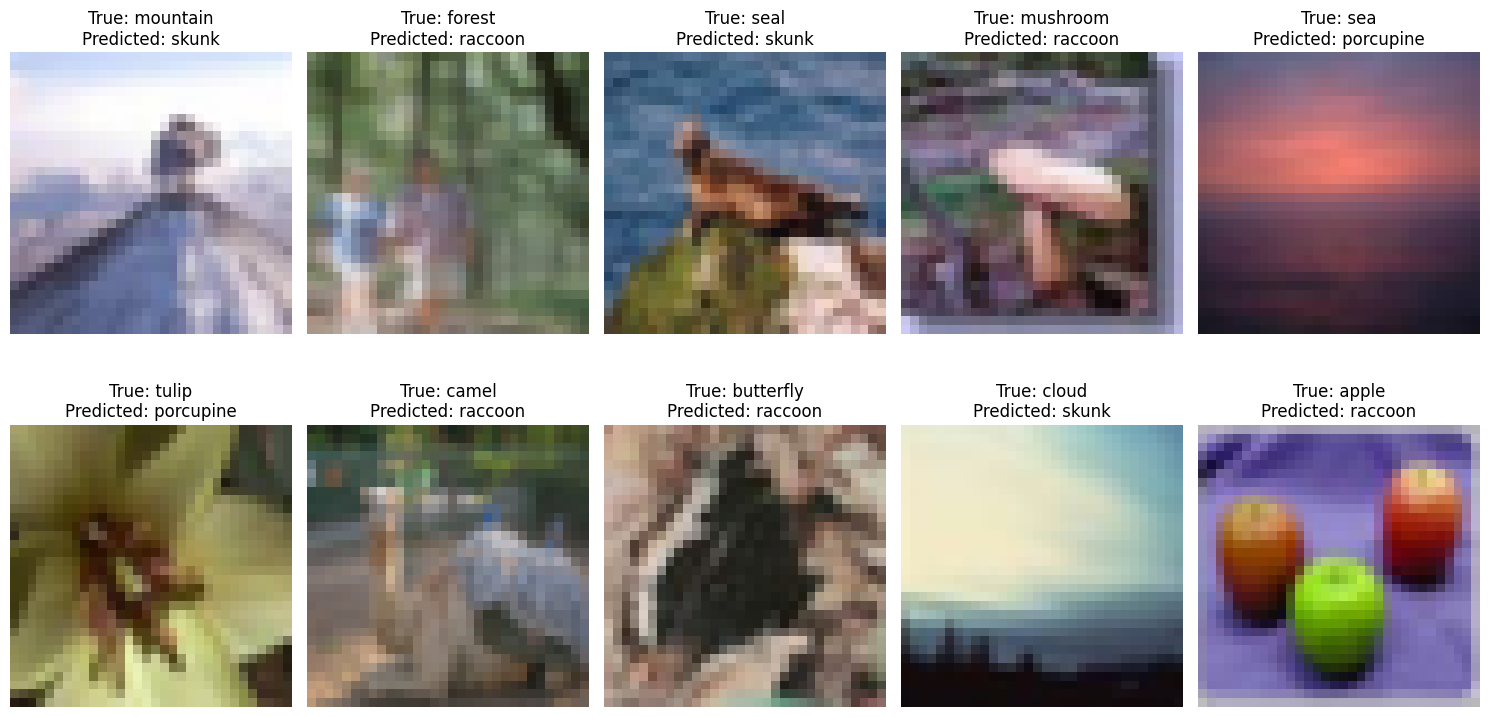

In [18]:
# Plot some sample images with predicted and true labels
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    true_label = classes[y_test[i]]
    pred_label = classes[y_pred_ann[i]]
    plt.title(f"True: {true_label}\nPredicted: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

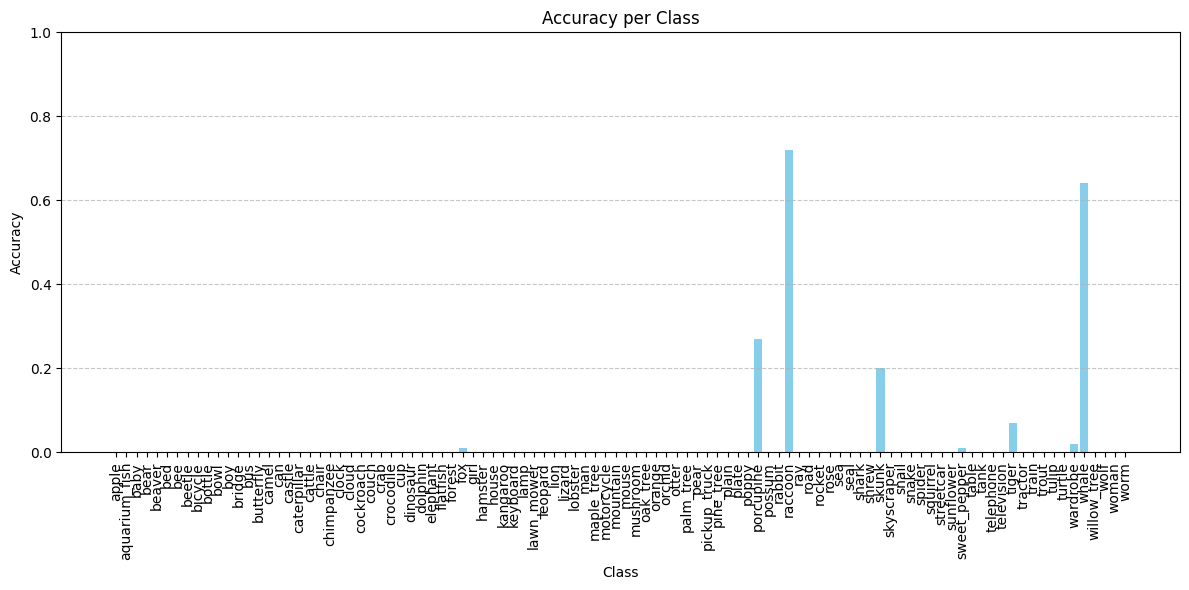

In [19]:
# Plot accuracy per class
class_accuracy = conf_mat_ann.diagonal() / conf_mat_ann.sum(axis=1)
plt.figure(figsize=(12, 6))
plt.bar(range(100), class_accuracy, color='skyblue')
plt.title('Accuracy per Class')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(100), labels=classes, rotation=90)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [20]:
%%time
#CNN
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(X_train)

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(100, activation='softmax')
])


cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


history_cnn = cnn.fit(datagen.flow(X_train, y_train, batch_size=32),
                      steps_per_epoch=len(X_train) / 32,  # Number of batches per epoch
                      epochs=30,
                      validation_data=(X_val, y_val))


Epoch 1/30
1250/1250 [==============================] - 15s 11ms/step - loss: 4.1106 - accuracy: 0.0865 - val_loss: 3.4921 - val_accuracy: 0.1735
Epoch 2/30
1250/1250 [==============================] - 14s 11ms/step - loss: 3.6273 - accuracy: 0.1473 - val_loss: 3.3703 - val_accuracy: 0.2014
Epoch 3/30
1250/1250 [==============================] - 13s 11ms/step - loss: 3.4100 - accuracy: 0.1832 - val_loss: 3.0078 - val_accuracy: 0.2493
Epoch 4/30
1250/1250 [==============================] - 13s 10ms/step - loss: 3.2494 - accuracy: 0.2093 - val_loss: 2.8813 - val_accuracy: 0.2774
Epoch 5/30
1250/1250 [==============================] - 14s 11ms/step - loss: 3.1242 - accuracy: 0.2316 - val_loss: 3.0644 - val_accuracy: 0.2559
Epoch 6/30
1250/1250 [==============================] - 14s 11ms/step - loss: 3.0166 - accuracy: 0.2557 - val_loss: 2.7053 - val_accuracy: 0.3145
Epoch 7/30
1250/1250 [==============================] - 13s 10ms/step - loss: 2.9342 - accuracy: 0.2711 - val_loss: 2.7656 -

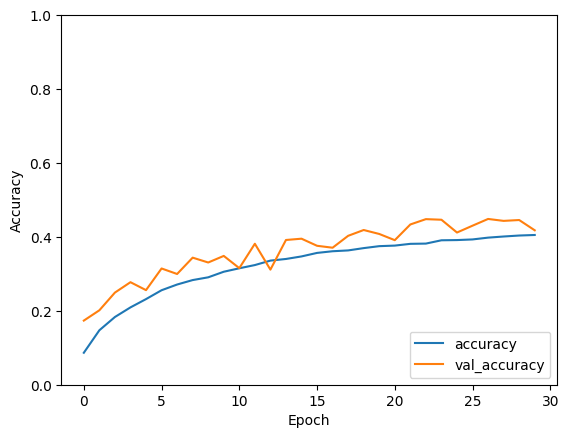

In [21]:
# Plot CNN training history
plt.plot(history_cnn.history['accuracy'], label='accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [22]:
# Evaluate CNN model on test set
test_loss_cnn, test_acc_cnn = cnn.evaluate(X_test, y_test)
print(f'Test accuracy (CNN): {test_acc_cnn}')



313/313 [==============================] - 1s 2ms/step - loss: 2.2316 - accuracy: 0.4229
Test accuracy (CNN): 0.42289999127388


In [23]:
# Make predictions using CNN model
y_pred_cnn = np.argmax(cnn.predict(X_test), axis=-1)



313/313 [==============================] - 0s 1ms/step


In [24]:
# Print classification report for CNN model
print(classification_report(y_test, y_pred_cnn))



              precision    recall  f1-score   support

           0       0.84      0.64      0.73       100
           1       0.59      0.55      0.57       100
           2       0.42      0.30      0.35       100
           3       0.30      0.07      0.11       100
           4       0.21      0.18      0.19       100
           5       0.45      0.30      0.36       100
           6       0.46      0.59      0.52       100
           7       0.42      0.50      0.45       100
           8       0.25      0.65      0.36       100
           9       0.71      0.50      0.59       100
          10       0.49      0.24      0.32       100
          11       0.27      0.28      0.27       100
          12       0.38      0.64      0.47       100
          13       0.33      0.24      0.28       100
          14       0.30      0.48      0.37       100
          15       0.42      0.19      0.26       100
          16       0.41      0.46      0.44       100
          17       0.47    

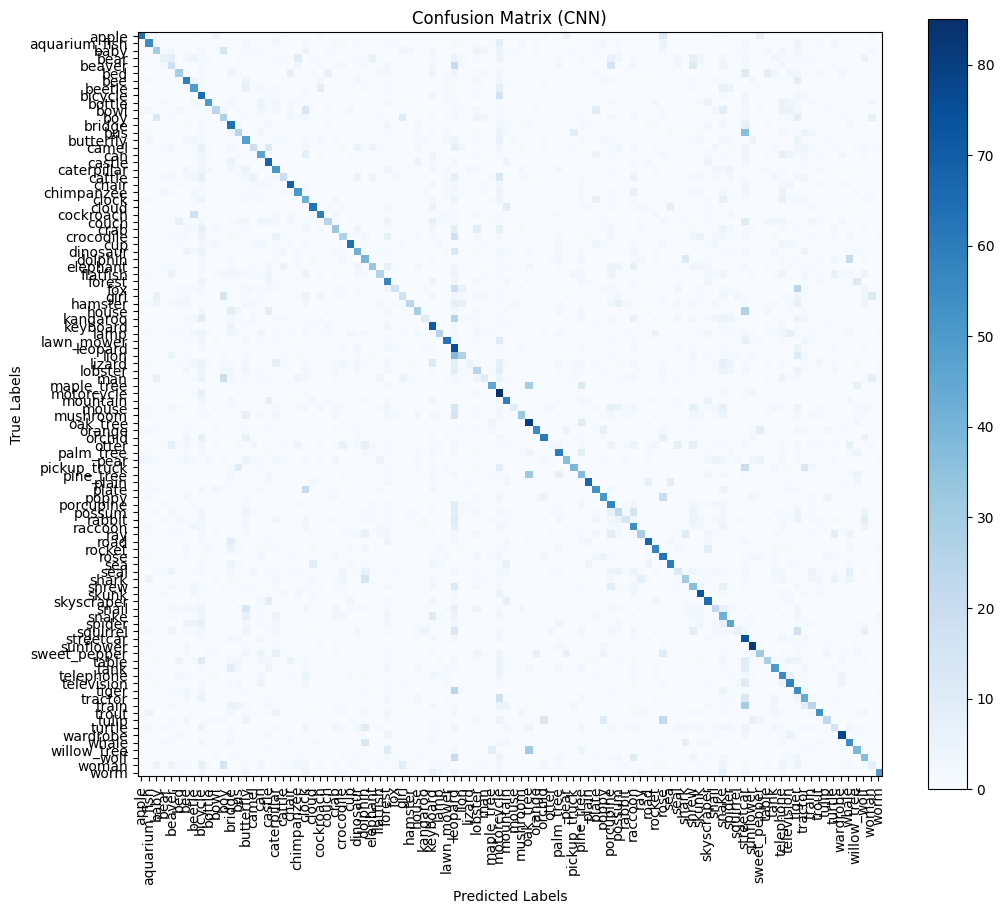

In [25]:
# Plot confusion matrix for CNN model
conf_mat_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(12, 10))
plt.imshow(conf_mat_cnn, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix (CNN)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=range(100), labels=classes, rotation=90)
plt.yticks(ticks=range(100), labels=classes)
plt.show()

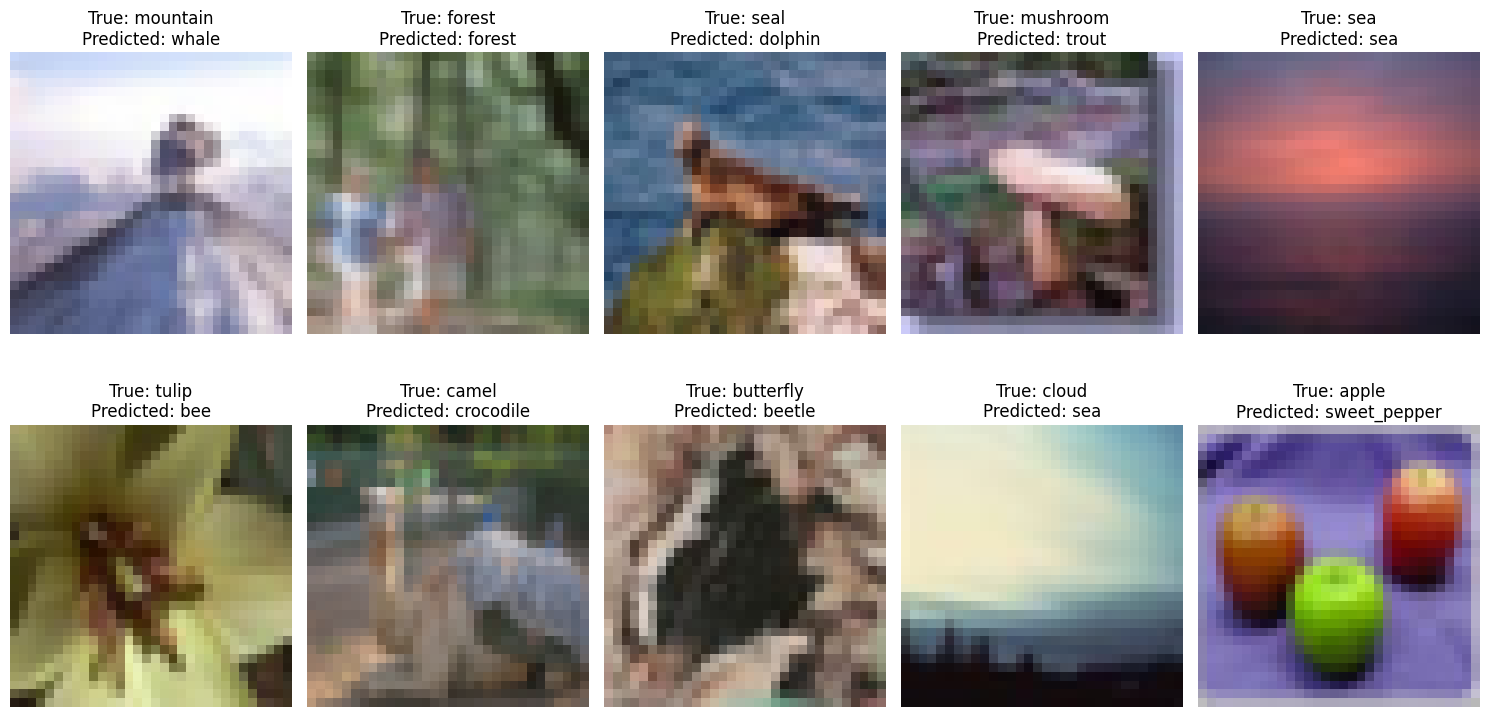

In [26]:
# Plot some sample images with predicted and true labels
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    true_label = classes[y_test[i]]
    pred_label = classes[y_pred_cnn[i]]
    plt.title(f"True: {true_label}\nPredicted: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

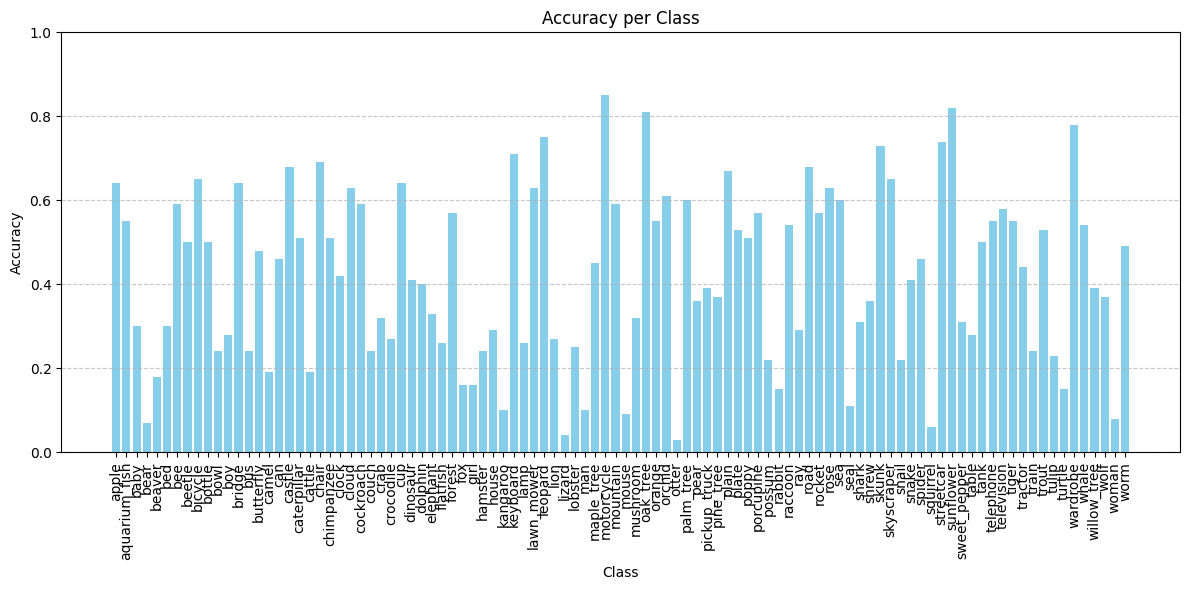

In [27]:
# Plot accuracy per class
class_accuracy = conf_mat_cnn.diagonal() / conf_mat_cnn.sum(axis=1)
plt.figure(figsize=(12, 6))
plt.bar(range(100), class_accuracy, color='skyblue')
plt.title('Accuracy per Class')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(100), labels=classes, rotation=90)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [42]:
%%time
#SVM
# Reshape the data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Apply PCA to the entire dataset
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

# Split the transformed data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_pca, y_train, test_size=0.2, random_state=42)

# Create the SVM classifier with RBF kernel
svm_classifier = svm.SVC(kernel='rbf')

# Train the classifier on the training data after PCA
svm_classifier.fit(X_train_split, y_train_split)

# Predict on the validation set after PCA
y_pred_val_pca = svm_classifier.predict(X_val_split)

# Calculate accuracy on the validation set after PCA
accuracy_val_pca = accuracy_score(y_val_split, y_pred_val_pca)
print("Validation Accuracy after PCA:", accuracy_val_pca)

# Predict on the test set after PCA
y_pred_test_pca = svm_classifier.predict(X_test_pca)

# Calculate accuracy on the test set after PCA
accuracy_test_pca = accuracy_score(y_test, y_pred_test_pca)
print("Test Accuracy after PCA:", accuracy_test_pca)



Validation Accuracy after PCA: 0.235125
Test Accuracy after PCA: 0.2423
CPU times: total: 2min 46s
Wall time: 2min 43s


In [43]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test_pca))

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.50      0.47       100
           1       0.19      0.38      0.26       100
           2       0.17      0.20      0.18       100
           3       0.12      0.14      0.13       100
           4       0.11      0.21      0.15       100
           5       0.15      0.29      0.19       100
           6       0.19      0.19      0.19       100
           7       0.18      0.27      0.21       100
           8       0.25      0.18      0.21       100
           9       0.43      0.29      0.35       100
          10       0.10      0.05      0.07       100
          11       0.15      0.07      0.10       100
          12       0.24      0.18      0.20       100
          13       0.18      0.22      0.20       100
          14       0.15      0.13      0.14       100
          15       0.15      0.10      0.12       100
          16       0.40      0.19      0.26       100
    

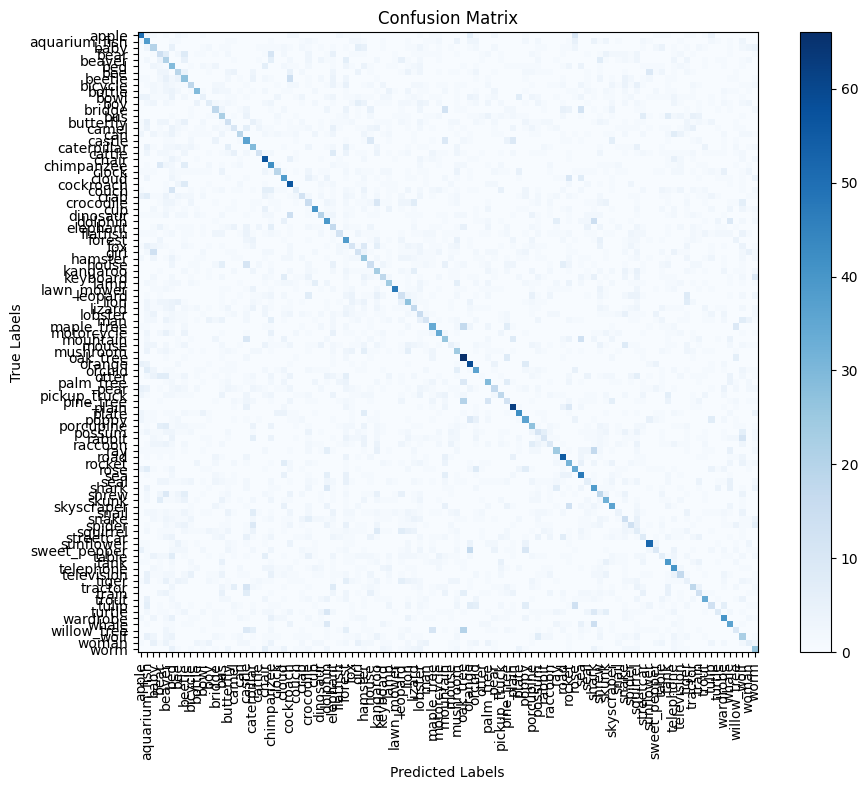

In [44]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test_pca)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=range(100), labels=classes, rotation=90)
plt.yticks(ticks=range(100), labels=classes)
plt.tight_layout()
plt.show()

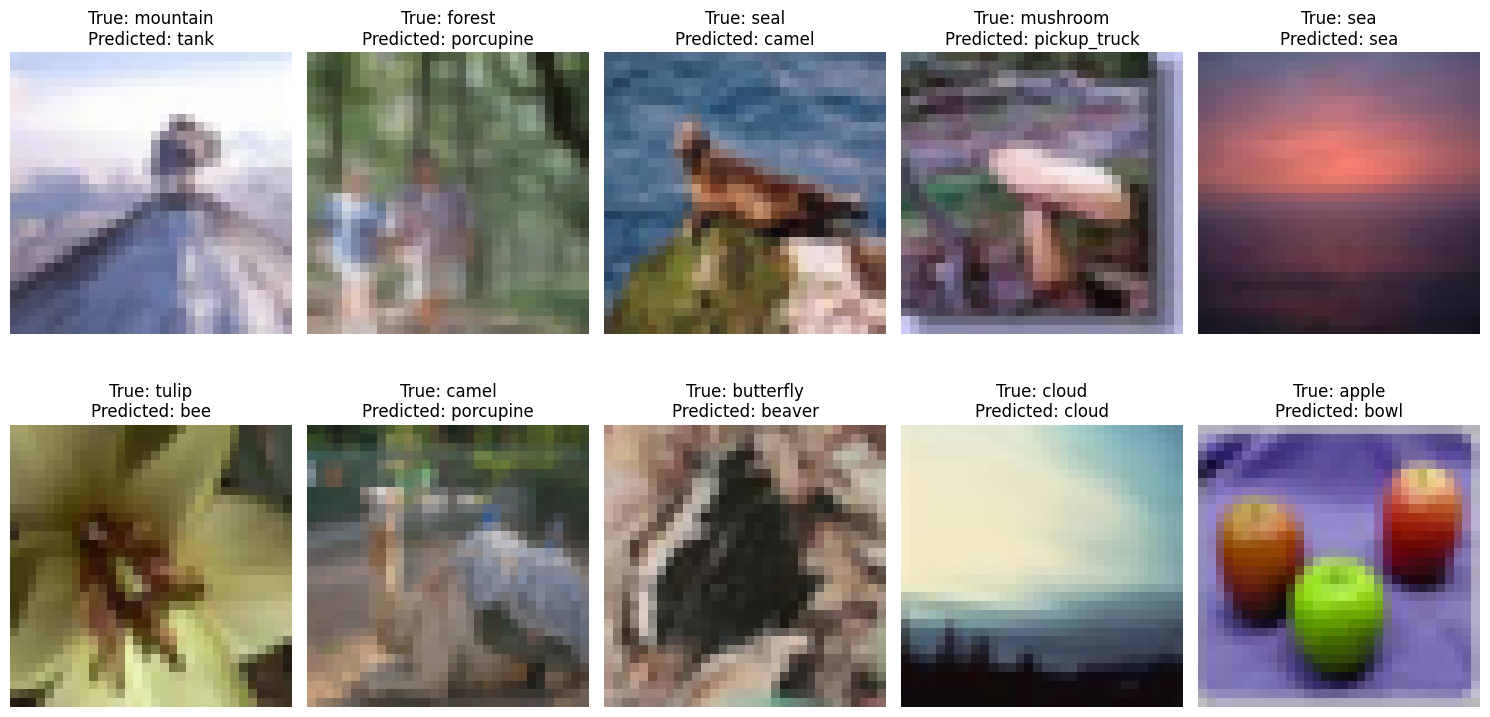

In [45]:
# Plot some sample images with predicted and true labels
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"True: {classes[y_test[i]]}\nPredicted: {classes[y_pred_test_pca[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

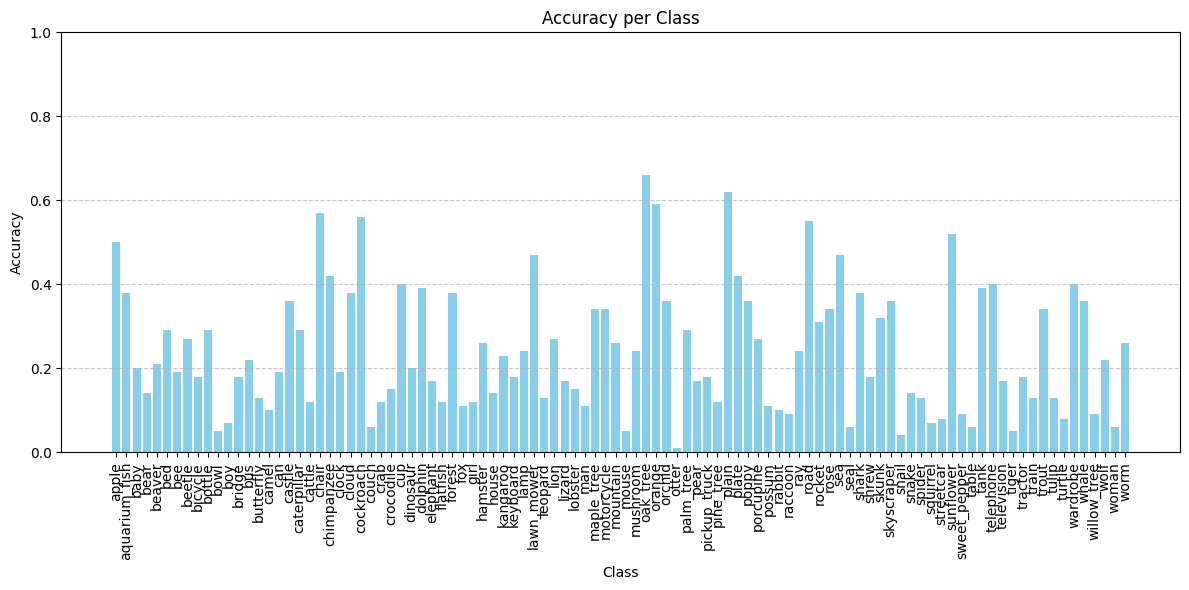

In [46]:
# Plot accuracy per class
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
plt.figure(figsize=(12, 6))
plt.bar(range(100), class_accuracy, color='skyblue')
plt.title('Accuracy per Class')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(100), labels=classes, rotation=90)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
